In [36]:
import torch
import numpy as np 
import rawpy

import ipyplot

from glob import glob
import os
import os.path as op

In [37]:
sony_data_root = op.join("/tmp2","igor","camera_backup","Sony","total")
nikon_data_root = op.join("/tmp2","igor","camera_backup","Nikon","total")
assert op.exists(sony_data_root)
assert op.exists(nikon_data_root)
raw_file_name = "DSC01088.ARW"
nikon_raw_file_name = "DSC_0550.NEF"
raw_file_path = op.join(sony_data_root, raw_file_name)
nikon_raw_file_path = op.join(nikon_data_root, nikon_raw_file_name)
assert op.exists(raw_file_path)
assert op.exists(nikon_raw_file_path)
jpg_file_path = raw_file_path.replace("ARW","JPG")
nikon_jpg_file_path = raw_file_path.replace("NEF","JPG")
assert op.exists(jpg_file_path)
assert op.exists(nikon_jpg_file_path)

class Self:
    def __init__(self, raw_file_path, bit_depth):
        self.raw_file_list = [raw_file_path, nikon_raw_file_path]
        self.bit_depth = bit_depth
        
self = Self(raw_file_path, 14)
print(self.__dir__())

['raw_file_list', 'bit_depth', '__module__', '__init__', '__dict__', '__weakref__', '__doc__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']


# Data loader

In [38]:
def load_raw_image(self, image_index):
    _img = rawpy.imread(self.raw_file_list[image_index])
    ih, iw, tm, lm = _img.sizes.height, _img.sizes.width, _img.sizes.top_margin, _img.sizes.left_margin
    img = _img.raw_image[tm:ih,lm:iw].copy()
    img = np.expand_dims(img,axis=2) 
    if not len(set(_img.black_level_per_channel)): raise NotImplementedError
    if not len(set(_img.camera_white_level_per_channel)): raise NotImplementedError
    black_level = _img.black_level_per_channel[0] # assume all black level is the same
    white_level = _img.white_level
    new_img = np.minimum(np.maximum(img.astype(np.float32) - black_level , 0), white_level - black_level) / (white_level - black_level)
    return new_img

(3672, 5496, 1) (1836, 2748, 4)
0.0 1.0 0.03206107
float32



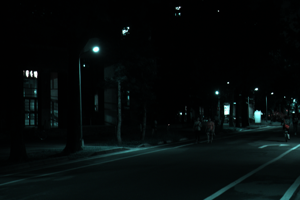


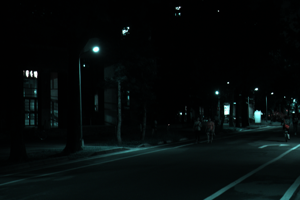

In [53]:
image = load_raw_image(self, 0)
H, W = image.shape[0:2]
out = np.concatenate((image[0:H:2, 0:W:2, :],           # R
                              image[0:H:2, 1:W:2, :],           # GR
                              image[1:H:2, 0:W:2, :],           # GB
                              image[1:H:2, 1:W:2, :]), axis=2)  # B

print(image.shape, out.shape)
print(image.min(),image.max(),image.mean())
print(out.dtype)
ipyplot.plot_images([out[:,:,:3]], img_width=300,max_images=3)

In [7]:
rawpy.imread(self.raw_file_list[0]).__dir__()

['__new__',
 '__enter__',
 '__exit__',
 'close',
 'open_file',
 'open_buffer',
 'unpack',
 'unpack_thumb',
 'raw_value',
 'raw_value_visible',
 'raw_color',
 'dcraw_process',
 'dcraw_make_mem_image',
 'dcraw_make_mem_thumb',
 'extract_thumb',
 'postprocess',
 'raw_type',
 'raw_image',
 'raw_image_visible',
 'sizes',
 'num_colors',
 'color_desc',
 'raw_colors',
 'raw_colors_visible',
 'raw_pattern',
 'camera_whitebalance',
 'daylight_whitebalance',
 'black_level_per_channel',
 'white_level',
 'camera_white_level_per_channel',
 'color_matrix',
 'rgb_xyz_matrix',
 'tone_curve',
 '__doc__',
 '__pyx_vtable__',
 '__reduce__',
 '__setstate__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__reduce_ex__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [27]:
rawpy.imread(self.raw_file_list[0]).white_level-rawpy.imread(self.raw_file_list[0]).black_level_per_channel[0]

15580

In [48]:
rawpy.imread(self.raw_file_list[0]).rgb_xyz_matrix.copy()

array([[ 1.0315, -0.439 , -0.0937],
       [-0.4859,  1.2734,  0.2365],
       [-0.0734,  0.1537,  0.5997],
       [ 0.    ,  0.    ,  0.    ]], dtype=float32)

In [52]:
import copy
copy.copy(rawpy.imread(self.raw_file_list[0]).tone_curve)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [59]:
rawpy.imread(self.raw_file_list[0]).color_desc.decode() == "RGBG"

True